<a href="https://colab.research.google.com/github/Anandtripathy/Daily-Task/blob/master/predictive_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
#from kneed import KneeLocator
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import plotly.graph_objs as go
import plotly .offline as offline
import plotly.figure_factory as ff
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_rows', None)

In [5]:
virus=pd.read_csv("top_1000_pe_imports.csv")

In [3]:
virus

In [6]:
virus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47580 entries, 0 to 47579
Columns: 1002 entries, hash to malware
dtypes: int64(1001), object(1)
memory usage: 363.7+ MB


In [7]:
virus.head(10)

,hash,GetProcAddress,ExitProcess,WriteFile,GetLastError,CloseHandle,FreeLibrary,Sleep,GetStdHandle,MultiByteToWideChar,GetCurrentThreadId,FindClose,LeaveCriticalSection,EnterCriticalSection,VirtualAlloc,DeleteCriticalSection,WideCharToMultiByte,RegCloseKey,ReadFile,SetFilePointer,GetCurrentProcess,GetACP,UnhandledExceptionFilter,RaiseException,RtlUnwind,TlsGetValue,TlsSetValue,GetModuleHandleW,GetCPInfo,GetCurrentProcessId,VirtualFree,GetDC,GetModuleFileNameW,CreateFileW,SetEndOfFile,SetLastError,GetCommandLineW,DestroyWindow,QueryPerformanceCounter,VirtualQuery,...,malloc,_XcptFilter,__vbaFreeVarList,CoInitializeEx,GetTextColor,GetUserNameA,listen,inet_addr,TextOutW,__p__commode,IsValidAcl,gethostname,PostThreadMessageW,ReportEventW,__vbaFreeObj,CreateFileMappingA,DragQueryFileW,_onexit,ImpersonateLoggedOnUser,InitializeAcl,MessageBoxIndirectW,SendDlgItemMessageW,__vbaVarMove,GetDriveTypeA,GetCurrentObject,GetNearestPaletteIndex,DosDateTimeToFileTime,FreeConsole,SetFileSecurityA,DuplicateToken,bind,RegEnumKeyExA,WinHttpOpen,_controlfp,WinExec,GetSecurityDescriptorDacl,FindFirstFreeAce,GetTimeFormatW,LookupAccountSidW,malware
0,071e8c3f8922e186e57548cd4c703a5d,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,33f8e6d08a6aae939f25a8e0d63dd523,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,b68abd064e975e1c6d5f25e748663076,1,1,1,1,1,0,1,0,1,0,1,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,72049be7bd30ea61297ea624ae198067,1,1,1,1,0,0,1,1,1,1,0,1,1,1,1,1,0,0,0,1,1,1,0,1,1,1,1,1,1,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,c9b3700a77facf29172f32df6bc77f48,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,cc6217be863e606e49da90fee2252f52,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,f7a1a3c38809d807b3f5f4cc00b1e9b7,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,a2597ae310f53a6b70c6951a3245dc4a,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,164b56522eb24164184460f8523ed7e2,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,...,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
9,56ae1459ba61a14eb119982d6ec793d7,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [8]:
virus.tail()

,hash,GetProcAddress,ExitProcess,WriteFile,GetLastError,CloseHandle,FreeLibrary,Sleep,GetStdHandle,MultiByteToWideChar,GetCurrentThreadId,FindClose,LeaveCriticalSection,EnterCriticalSection,VirtualAlloc,DeleteCriticalSection,WideCharToMultiByte,RegCloseKey,ReadFile,SetFilePointer,GetCurrentProcess,GetACP,UnhandledExceptionFilter,RaiseException,RtlUnwind,TlsGetValue,TlsSetValue,GetModuleHandleW,GetCPInfo,GetCurrentProcessId,VirtualFree,GetDC,GetModuleFileNameW,CreateFileW,SetEndOfFile,SetLastError,GetCommandLineW,DestroyWindow,QueryPerformanceCounter,VirtualQuery,...,malloc,_XcptFilter,__vbaFreeVarList,CoInitializeEx,GetTextColor,GetUserNameA,listen,inet_addr,TextOutW,__p__commode,IsValidAcl,gethostname,PostThreadMessageW,ReportEventW,__vbaFreeObj,CreateFileMappingA,DragQueryFileW,_onexit,ImpersonateLoggedOnUser,InitializeAcl,MessageBoxIndirectW,SendDlgItemMessageW,__vbaVarMove,GetDriveTypeA,GetCurrentObject,GetNearestPaletteIndex,DosDateTimeToFileTime,FreeConsole,SetFileSecurityA,DuplicateToken,bind,RegEnumKeyExA,WinHttpOpen,_controlfp,WinExec,GetSecurityDescriptorDacl,FindFirstFreeAce,GetTimeFormatW,LookupAccountSidW,malware
47575,9b917bab7f32188ae40c744f2be9aaf8,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
47576,35a18ee05f75f04912018d9f462cb990,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
47577,654139d715abcf7ecdddbef5a84f224b,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
47578,078c9d4e7be4819a06974c6f292a4857,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
47579,28a46c37f3a894f6d4ce8c38c2ff1fb1,1,0,0,1,1,0,1,0,1,1,0,1,1,1,1,1,0,0,0,1,0,1,0,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,1,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
virus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47580 entries, 0 to 47579
Columns: 1002 entries, hash to malware
dtypes: int64(1001), object(1)
memory usage: 363.7+ MB


In [11]:
virus.min()

hash                                         0000f373c9207f635ce55526a5f93c67
GetProcAddress                                                              0
ExitProcess                                                                 0
WriteFile                                                                   0
GetLastError                                                                0
CloseHandle                                                                 0
FreeLibrary                                                                 0
Sleep                                                                       0
GetStdHandle                                                                0
MultiByteToWideChar                                                         0
GetCurrentThreadId                                                          0
FindClose                                                                   0
LeaveCriticalSection                                            

In [12]:
virus.max()

hash                                         fffe63678ee9a495bf2435f7037c551a
GetProcAddress                                                              1
ExitProcess                                                                 1
WriteFile                                                                   1
GetLastError                                                                1
CloseHandle                                                                 1
FreeLibrary                                                                 1
Sleep                                                                       1
GetStdHandle                                                                1
MultiByteToWideChar                                                         1
GetCurrentThreadId                                                          1
FindClose                                                                   1
LeaveCriticalSection                                            

In [13]:
#virus.mean()

In [14]:
virus.describe()

,GetProcAddress,ExitProcess,WriteFile,GetLastError,CloseHandle,FreeLibrary,Sleep,GetStdHandle,MultiByteToWideChar,GetCurrentThreadId,FindClose,LeaveCriticalSection,EnterCriticalSection,VirtualAlloc,DeleteCriticalSection,WideCharToMultiByte,RegCloseKey,ReadFile,SetFilePointer,GetCurrentProcess,GetACP,UnhandledExceptionFilter,RaiseException,RtlUnwind,TlsGetValue,TlsSetValue,GetModuleHandleW,GetCPInfo,GetCurrentProcessId,VirtualFree,GetDC,GetModuleFileNameW,CreateFileW,SetEndOfFile,SetLastError,GetCommandLineW,DestroyWindow,QueryPerformanceCounter,VirtualQuery,ShowWindow,...,malloc,_XcptFilter,__vbaFreeVarList,CoInitializeEx,GetTextColor,GetUserNameA,listen,inet_addr,TextOutW,__p__commode,IsValidAcl,gethostname,PostThreadMessageW,ReportEventW,__vbaFreeObj,CreateFileMappingA,DragQueryFileW,_onexit,ImpersonateLoggedOnUser,InitializeAcl,MessageBoxIndirectW,SendDlgItemMessageW,__vbaVarMove,GetDriveTypeA,GetCurrentObject,GetNearestPaletteIndex,DosDateTimeToFileTime,FreeConsole,SetFileSecurityA,DuplicateToken,bind,RegEnumKeyExA,WinHttpOpen,_controlfp,WinExec,GetSecurityDescriptorDacl,FindFirstFreeAce,GetTimeFormatW,LookupAccountSidW,malware
count,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,...,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000
mean,0.872236,0.847079,0.760004,0.783459,0.770618,0.683501,0.665826,0.669966,0.756578,0.674107,0.678983,0.660109,0.659983,0.618495,0.653510,0.702165,0.605485,0.632892,0.595019,0.670156,0.656494,0.665322,0.634216,0.659142,0.659500,0.654750,0.578710,0.647268,0.632934,0.567318,0.617423,0.552207,0.568411,0.482871,0.573834,0.549075,0.567865,0.556810,0.428226,0.552459,...,0.027238,0.027196,0.027154,0.027028,0.027007,0.026923,0.026776,0.026482,0.026503,0.026377,0.026356,0.026251,0.026251,0.026230,0.026040,0.025914,0.025914,0.025872,0.025788,0.025683,0.025431,0.025284,0.025263,0.025158,0.025158,0.025095,0.025074,0.024863,0.024821,0.024821,0.024800,0.024590,0.024401,0.024359,0.024275,0.024191,0.024149,0.023939,0.023686,0.959458
std,0.333830,0.359915,0.427085,0.411891,0.420440,0.465115,0.471706,0.470230,0.429152,0.468713,0.466872,0.473677,0.473719,0.485761,0.475857,0.457311,0.488751,0.482021,0.490894,0.470161,0.474883,0.471883,0.481654,0.474003,0.473882,0.475455,0.493771,0.477825,0.482010,0.495453,0.486021,0.497272,0.495303,0.499712,0.494524,0.497591,0.495378,0.496767,0.494827,0.497246,...,0.162779,0.162657,0.162535,0.162167,0.162106,0.161860,0.161430,0.160565,0.160627,0.160254,0.160192,0.159881,0.159881,0.159819,0.159257,0.158881,0.158881,0.158756,0.158504,0.158190,0.157431,0.156987,0.156924,0.156605,0.156605,0.156414,0.156350,0.155710,0.155582,0.155582,0.155518,0.154874,0.154292,0.154163,0.153903,0.153643,0.153513,0.152860,0.152072,0.197229
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [15]:
virus.keys()

Index(['hash', 'GetProcAddress', 'ExitProcess', 'WriteFile', 'GetLastError',
       'CloseHandle', 'FreeLibrary', 'Sleep', 'GetStdHandle',
       'MultiByteToWideChar',
       ...
       'bind', 'RegEnumKeyExA', 'WinHttpOpen', '_controlfp', 'WinExec',
       'GetSecurityDescriptorDacl', 'FindFirstFreeAce', 'GetTimeFormatW',
       'LookupAccountSidW', 'malware'],
      dtype='object', length=1002)

In [16]:
virus.isnull().any()

hash                                         False
GetProcAddress                               False
ExitProcess                                  False
WriteFile                                    False
GetLastError                                 False
CloseHandle                                  False
FreeLibrary                                  False
Sleep                                        False
GetStdHandle                                 False
MultiByteToWideChar                          False
GetCurrentThreadId                           False
FindClose                                    False
LeaveCriticalSection                         False
EnterCriticalSection                         False
VirtualAlloc                                 False
DeleteCriticalSection                        False
WideCharToMultiByte                          False
RegCloseKey                                  False
ReadFile                                     False
SetFilePointer                 

In [17]:
#x= virus.drop(['hash'],axis=1)

In [18]:
#y = virus['hash']

In [19]:
#x.shape

In [20]:
#y.shape

In [21]:
virus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47580 entries, 0 to 47579
Columns: 1002 entries, hash to malware
dtypes: int64(1001), object(1)
memory usage: 363.7+ MB


In [22]:
#virus.isnull().any()

In [23]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [24]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [25]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [26]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# top_1000_pe_imports.csv has 47580 rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('top_1000_pe_imports.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'top_1000_pe_imports.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 1002 columns


In [27]:
#plotCorrelationMatrix(df1, 250)

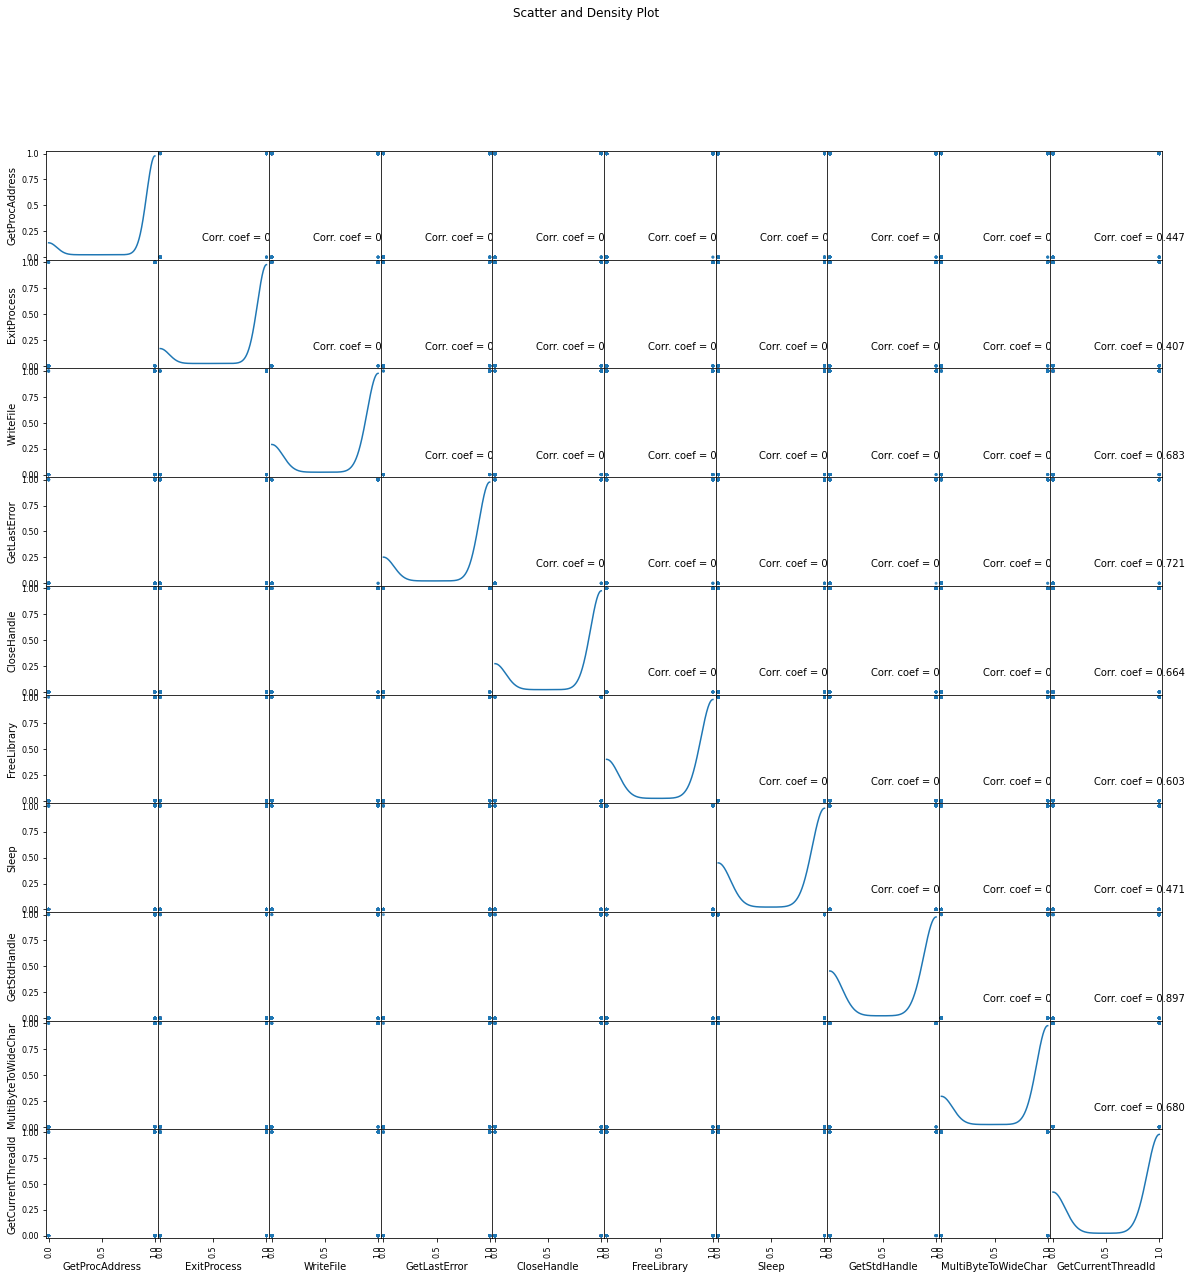

In [28]:
plotScatterMatrix(df1, 20, 10)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



                                           GetProcAddress  ...   malware
GetProcAddress                                   1.000000  ...  0.030180
ExitProcess                                      0.847768  ...  0.123767
WriteFile                                        0.649377  ...  0.109550
GetLastError                                     0.637042  ... -0.004581
CloseHandle                                      0.636808  ...  0.034856
FreeLibrary                                      0.546054  ...  0.024853
Sleep                                            0.482573  ... -0.036738
GetStdHandle                                     0.521198  ...  0.148747
MultiByteToWideChar                              0.651264  ...  0.080811
GetCurrentThreadId                               0.494700  ...  0.028500
FindClose                                        0.538676  ...  0.111104
LeaveCriticalSection                             0.511036  ...  0.106716
EnterCriticalSection                             0.

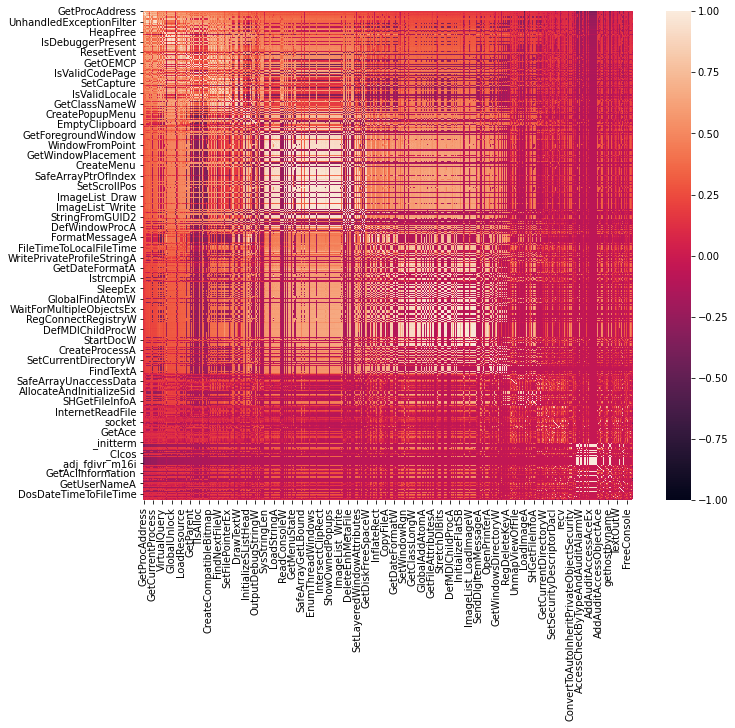

In [29]:
import seaborn as sns
corrmat = virus.corr()
f, ax = plt.subplots(figsize=(12, 9))
print(corrmat)
sns.heatmap(corrmat, vmax=1,vmin=-1, square=True);

In [30]:
# Plotting Correlation Heatmap
corr = virus.corr()
figure = ff.create_annotated_heatmap(
    z=corr.values,
    x=list(corr.columns),
    y=list(corr.index),
    annotation_text=corr.round(2).values,
    showscale=True)
offline.plot(figure,filename='corrheatmap_Anand.html')

KeyboardInterrupt: ignored

In [32]:
# Dividing dataset into label and feature sets
X = virus.drop('hash', axis = 1) # Features
Y = virus['hash'] # Labels

In [35]:
# Normalizing numerical features so that each feature has mean 0 and variance 1
feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(virus)

In [34]:
converter = LabelEncoder()
virus['hash'] = converter.fit_transform(virus['hash'].astype(str))

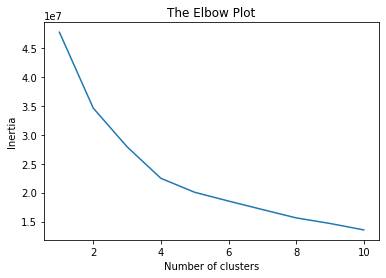

In [36]:
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

    
#Displaying the Elbow Plot    
plt.plot(range(1, 11), inertia)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()    


[34107237.666110754, -13082727.605102152, -6680606.658032961, -5441490.262045134, -2409001.0294791833, -1512520.6441127136, -1461154.8345097937, -1443819.9139122013, -961944.3406703062, -1113972.3782463055]


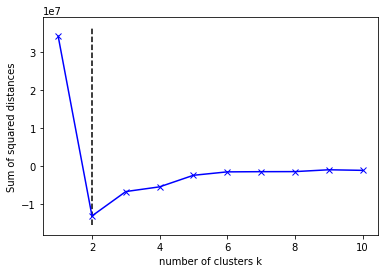

The Knee point is :  2


In [41]:
from kneed import KneeLocator
#Computing the Distance between the Points in the Elbow plot
derivates = []
for i in range(len(inertia)):
    derivates.append(inertia[i] - inertia[i-1])    
print(derivates)    

x = range(1, len(derivates)+1)

#Locating the Knee Point
kn = KneeLocator(x, derivates, curve='convex', direction='decreasing')
plt.xlabel('number of clusters k')
plt.ylabel('Sum of squared distances')
plt.plot(x, derivates, 'bx-')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()    
    
print("The Knee point is : ",
      kn.knee)    


In [42]:
kmeans = KMeans(n_clusters = kn.knee)
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [46]:
# Implementing PCA to visualize dataset
pca = PCA(n_components = 3)
pca.fit(X_scaled)
x_pca = pca.transform(X_scaled)
print("Variance explained by each of the n_components: ",pca.explained_variance_ratio_)
print("Total variance explained by the n_components: ",sum(pca.explained_variance_ratio_))
print("Cluster Centers: \n",kmeans.cluster_centers_)

fig = px.scatter_3d(x_pca, x=x_pca[:,0], y=x_pca[:,1], z=x_pca[:,2],
              color=kmeans.labels_)
plt.show()
offline.plot(fig,filename='pca.html')



Variance explained by each of the n_components:  [0.29551289 0.15145398 0.11382407]
Total variance explained by the n_components:  0.5607909370530982
Cluster Centers: 
 [[-0.03687027 -0.09153678 -0.10150418 ...  0.02950924 -0.11892612
  -0.0344536 ]
 [ 0.15389608  0.38207347  0.4236773  ... -0.12317125  0.49639628
   0.14380894]]


'pca.html'